In [0]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyspark.sql.functions as F
from pyspark.sql.functions import col, udf
from pyspark.sql.types import IntegerType

In [0]:
# Load the joined airlines and weather observations in from Parquet
blob_container = "w261" # The name of your container created in https://portal.azure.com
storage_account = "bdougall" # The name of your Storage account created in https://portal.azure.com
blob_url = f"wasbs://{blob_container}@{storage_account}.blob.core.windows.net"
mount_path = "/mnt/mids-w261"

# Read in the 
airlines_w_weather = spark.read.parquet(f"{blob_url}/added_v2")
airlines_selected = airlines_w_weather.filter(col('YEAR') < 2018).cache()

# Show the first few rows of the airlines dataframe
display(airlines_selected)

YEAR,MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,utc_scheduled_departure,utc_2hrs_before,wind_obs_type_origin,wind_obs_speed_origin,ceil_height_origin,vis_dist_origin,air_temp_origin,dew_pt_temp_origin,wind_obs_type_destination,wind_obs_speed_destination,ceil_height_destination,vis_dist_destination,air_temp_destination,dew_pt_temp_destination,HOUR,OUTCOME,rolling_perc_delayed,origin_dest_perc_24to2,origin_perc_24to2,last_flight_delayed,amount_last_delay,two_ago_delayed,three_ago_delayed,arrival_time_2_next_flight,last_flight_late_arrival,two_ago_late_arrival,three_ago_late_arrival
2015,1,4,2015-01-01,US,N109UW,FLL,PHL,1658,168.0,992.0,2015-01-01T19:10:00.000+0000,2015-01-01T17:10:00.000+0000,N,36,1981,16093,244,206,N,113,22000,16093,44,-111,14,0,0.0,0.0,5.263157894736842,-1,-9999.0,-1,-1,-9999,0,0,0
2015,1,4,2015-01-01,US,N109UW,PHL,TPA,2037,167.0,920.0,2015-01-01T22:50:00.000+0000,2015-01-01T20:50:00.000+0000,N,82,22000,16093,56,-100,N,15,549,16093,228,172,17,1,33.33333333333333,33.33333333333333,8.571428571428571,0,5.0,-1,-1,3120,-1,0,0
2015,1,5,2015-01-02,US,N109UW,TPA,CLT,835,100.0,507.0,2015-01-02T11:55:00.000+0000,2015-01-02T09:55:00.000+0000,N,21,61,805,172,167,N,21,3048,16093,67,0,6,0,12.5,12.5,11.494252873563218,1,14.0,0,-1,37080,1,1,0
2015,1,6,2015-01-03,US,N109UW,CLT,JFK,921,107.0,541.0,2015-01-03T12:34:00.000+0000,2015-01-03T10:34:00.000+0000,C,0,396,14484,90,70,C,0,7315,16093,-6,-67,7,0,26.666666666666668,12.5,12.080536912751679,0,1.0,1,0,82740,1,1,1
2015,1,6,2015-01-03,US,N109UW,JFK,CLT,1220,120.0,541.0,2015-01-03T15:20:00.000+0000,2015-01-03T13:20:00.000+0000,N,46,7925,16093,0,-61,N,15,152,8047,83,72,10,0,16.666666666666664,37.5,16.666666666666664,0,-5.0,0,1,3540,-1,1,1
2015,1,6,2015-01-03,US,N109UW,CLT,MSP,2,162.0,930.0,2015-01-04T03:20:00.000+0000,2015-01-04T01:20:00.000+0000,C,0,91,1609,100,94,N,93,518,2414,-72,-100,22,1,18.75,33.33333333333333,26.778242677824267,0,28.0,0,0,36000,1,0,1
2015,1,7,2015-01-04,US,N109UW,MSP,CLT,847,157.0,930.0,2015-01-04T11:10:00.000+0000,2015-01-04T09:10:00.000+0000,N,72,22000,16093,-156,-200,N,31,61,805,89,78,5,0,17.647058823529413,16.666666666666664,27.430555555555557,1,21.0,0,0,18480,1,1,0
2015,1,7,2015-01-04,US,N109UW,CLT,BWI,1107,87.0,361.0,2015-01-04T14:40:00.000+0000,2015-01-04T12:40:00.000+0000,N,15,61,402,89,83,N,15,183,9656,67,61,9,0,13.793103448275861,33.33333333333333,31.020408163265305,0,-9.0,1,0,3180,-1,1,1
2015,1,7,2015-01-04,US,N109UW,BWI,CLT,1327,87.0,361.0,2015-01-04T17:00:00.000+0000,2015-01-04T15:00:00.000+0000,N,46,183,16093,100,89,N,36,2438,6437,111,100,12,0,9.090909090909092,28.57142857142857,50.970873786407765,0,-6.0,0,1,3180,-1,0,1
2015,1,7,2015-01-04,US,N109UW,CLT,JFK,1606,106.0,541.0,2015-01-04T19:20:00.000+0000,2015-01-04T17:20:00.000+0000,N,46,3048,12875,144,128,N,46,61,402,100,83,14,1,38.46153846153847,71.42857142857143,33.969465648854964,0,-5.0,0,0,3180,-1,0,0


Out[11]:

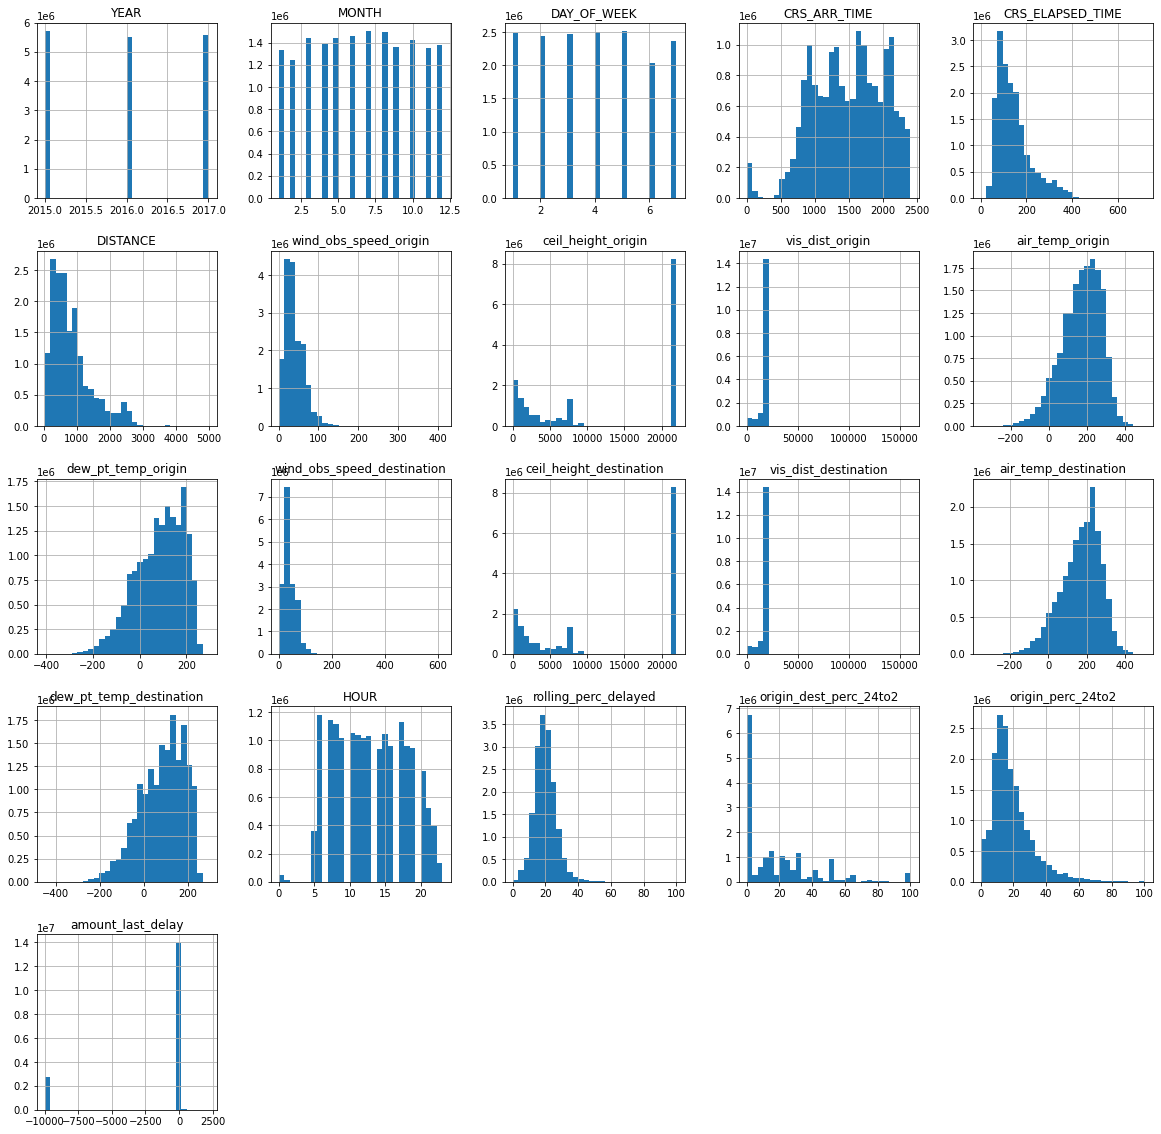

array([[<AxesSubplot:title={'center':'YEAR'}>,
 <AxesSubplot:title={'center':'MONTH'}>,
 <AxesSubplot:title={'center':'DAY_OF_WEEK'}>,
 <AxesSubplot:title={'center':'CRS_ARR_TIME'}>,
 <AxesSubplot:title={'center':'CRS_ELAPSED_TIME'}>],
 [<AxesSubplot:title={'center':'DISTANCE'}>,
 <AxesSubplot:title={'center':'wind_obs_speed_origin'}>,
 <AxesSubplot:title={'center':'ceil_height_origin'}>,
 <AxesSubplot:title={'center':'vis_dist_origin'}>,
 <AxesSubplot:title={'center':'air_temp_origin'}>],
 [<AxesSubplot:title={'center':'dew_pt_temp_origin'}>,
 <AxesSubplot:title={'center':'wind_obs_speed_destination'}>,
 <AxesSubplot:title={'center':'ceil_height_destination'}>,
 <AxesSubplot:title={'center':'vis_dist_destination'}>,
 <AxesSubplot:title={'center':'air_temp_destination'}>],
 [<AxesSubplot:title={'center':'dew_pt_temp_destination'}>,
 <AxesSubplot:title={'center':'HOUR'}>,
 <AxesSubplot:title={'center':'rolling_perc_delayed'}>,
 <AxesSubplot:title={'center':'origin_dest_perc_24to2'}>,
 <AxesSubplot:title={'center':'origin_perc_24to2'}>],
 [<AxesSubplot:title={'center':'amount_last_delay'}>,
 <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
 dtype=object)

In [0]:
# Check for correlation between numerical features
selected_numeric = [item[0] for item in airlines_selected.dtypes if (item[1].startswith('double') or item[1].startswith('int')) and item[1] != 'label']

# Plot charts showing the distribution of numeric features
# Air and dew point temp appear to be normally distributed; the rest of the numeric variables exhibit skew or are binary
# Some of the numeric variables have a very different scale - consider normalizing using the mean
# Amount of last delay has some missing values (-9999)
numeric_feature_hist = airlines_selected.select(selected_numeric).toPandas()
numeric_feature_hist.hist(figsize=(20, 20), bins=30)

Out[12]:

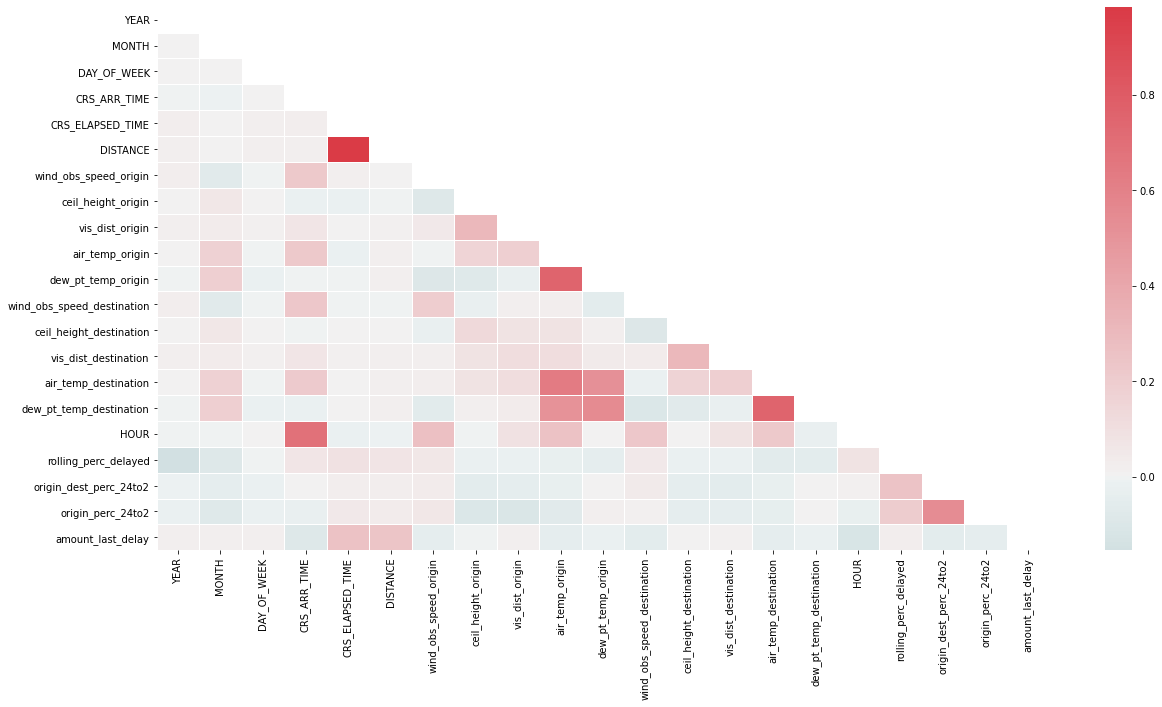

<AxesSubplot:>

In [0]:
# pivot the dataframe from long to wide form
numeric_corr = airlines_selected.select(selected_numeric).toPandas().corr()

# Actual elapsed time and distance are highly correlated, as are air temp, dew point temp, and elevation
# Consider only keeping 1 feature for each of these correlated groups
mask = np.zeros_like(numeric_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(200, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(numeric_corr, mask=mask, cmap=cmap, center=0, linewidths=.5)

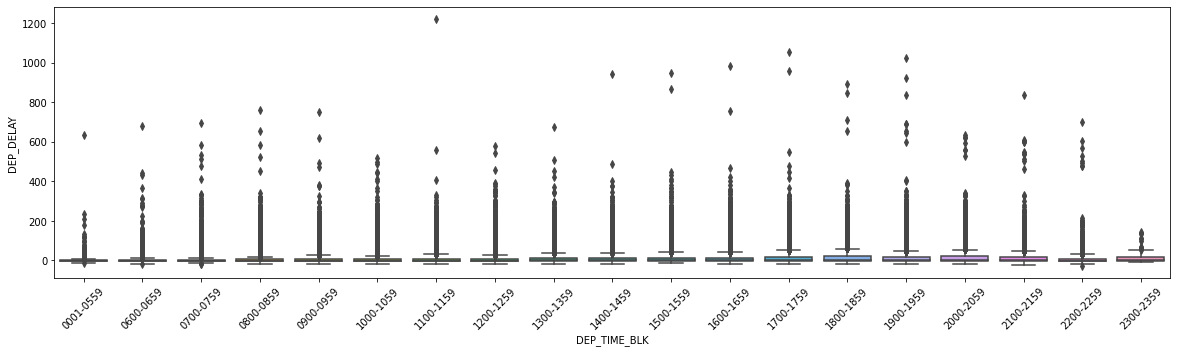

In [0]:
delay_blk = airlines_selected.select('DEP_TIME_BLK', 'DEP_DELAY').toPandas().sort_values(by=['DEP_TIME_BLK'])
plt.figure(figsize = (20,5))
dist_plot = sns.boxplot(x="DEP_TIME_BLK",
                y="DEP_DELAY",
                data=delay_blk)
for item in dist_plot.get_xticklabels():
    item.set_rotation(45)

In [0]:
# Average delays tend to increase over the course of the morning and decline again after 7 pm
delay_blk.groupby('DEP_TIME_BLK', as_index=False)['DEP_DELAY'].mean()

Out[8]:

,DEP_TIME_BLK,DEP_DELAY
0,0001-0559,2.685882
1,0600-0659,4.999395
2,0700-0759,6.495999
3,0800-0859,7.500382
4,0900-0959,9.284524
5,1000-1059,9.560923
6,1100-1159,10.897299
7,1200-1259,12.040698
8,1300-1359,12.588826
9,1400-1459,12.994274
